In [27]:
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from pathlib import Path
import numpy as np
import math

In [28]:
combined_dataframe = pd.read_csv("./TF_pathway_correlations_log10qvalue_noMCF7_v1.csv", index_col = "Pathway")

In [29]:
combined_dataframe = -combined_dataframe

In [30]:
direction_ofchange = pd.read_csv("./TF_pathway_correlations_mean_noMCF7_v1.csv", index_col = "Pathway")

In [31]:
direction_ofchange[direction_ofchange < 0] = -1.0
direction_ofchange[direction_ofchange >= 0] = 1.0

In [32]:
combined_dataframe.columns = combined_dataframe.columns.str.split('_').str[1]
direction_ofchange.columns = direction_ofchange.columns.str.split('_').str[1]

In [35]:
corrected_pvalues = direction_ofchange * combined_dataframe

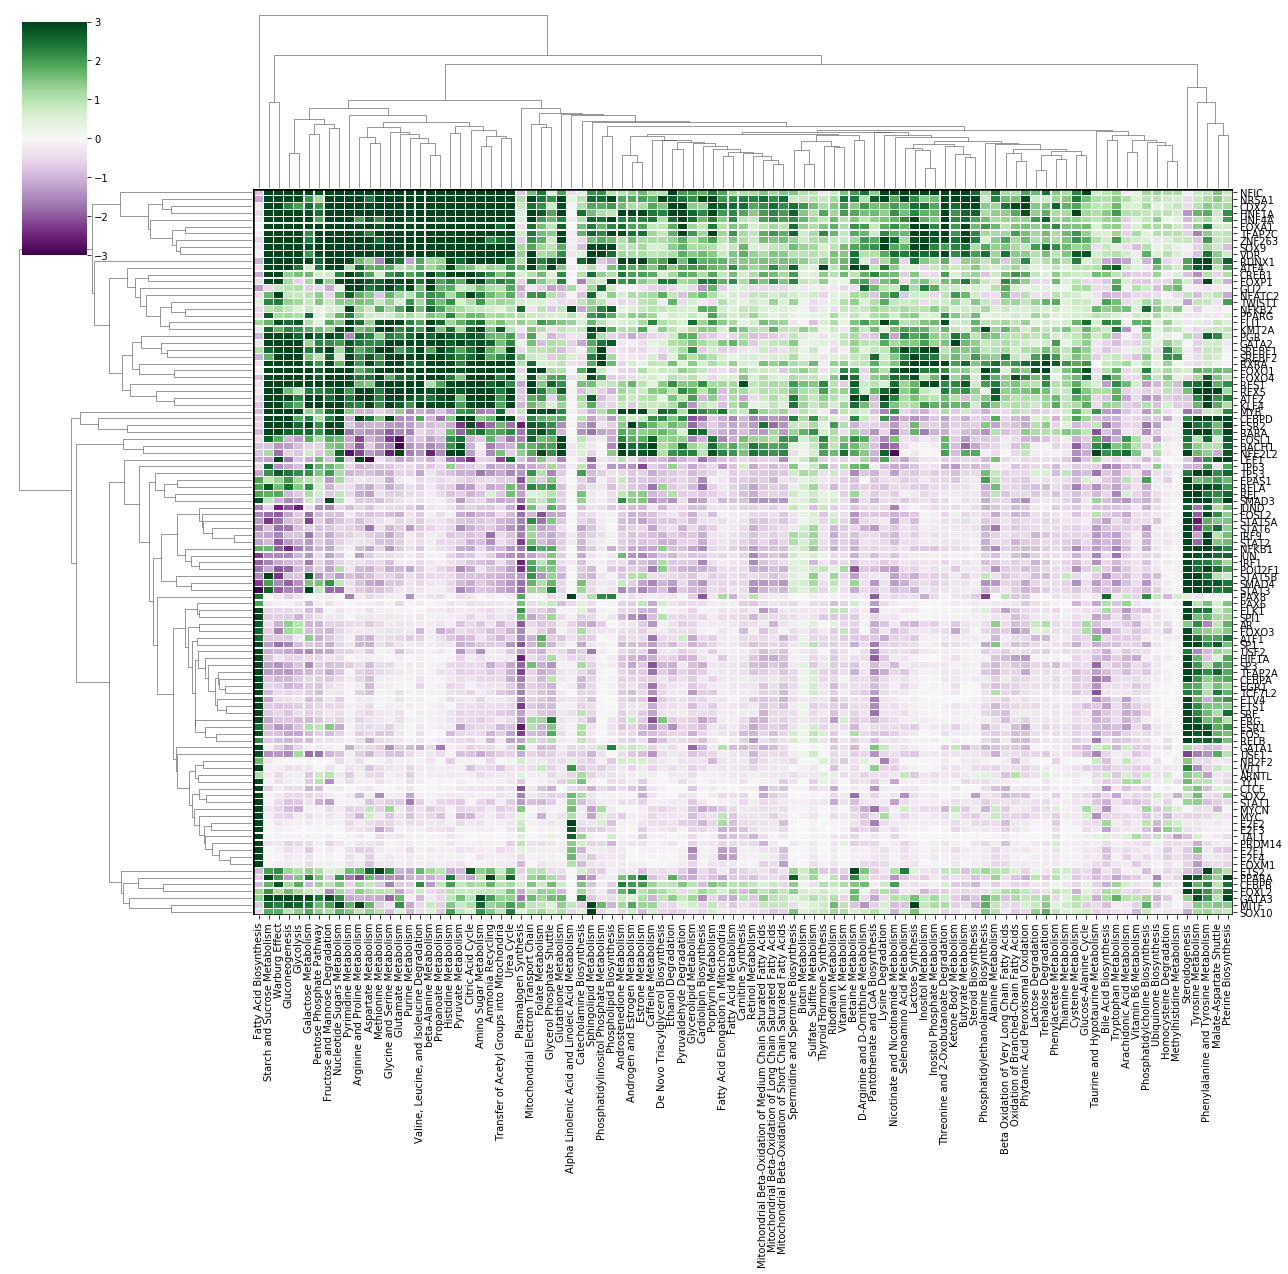

In [42]:
g = sns.clustermap(corrected_pvalues.transpose(), yticklabels = True, xticklabels = True, figsize = (18,18)
                   ,cmap = "PRGn", vmin = -np.log10(0.001), vmax = np.log10(0.001),
               lw = 0.25, linecolor="#fbfbfb")

ax = g.ax_heatmap
ax.set_xlabel("")
ax.axhline(0, c="k", lw = 2.5)
ax.axvline(corrected_pvalues.shape[0], c="k", lw = 2.5)
ax.axvline(0, c="k", lw = 2.5)
ax.axhline(corrected_pvalues.shape[1], c="k", lw = 2.5)

#ax.set_xticklabels(ax.get_xticklabels(), rotation =30, ha = "right", size = 10)

#ax.set_yticklabels(ax.get_yticklabels(), rotation =0, ha = "left", size = 8)

#cbar = ax.collections[0].colorbar
#cbar.set_ticks([-np.log10(0.05), -np.log10(0.01), -np.log10(0.001)])
#cbar.set_ticklabels(['0.05', '0.01', '0.001'])
#cbar.ax.tick_params(labelsize=12)
#cbar.outline.set_visible(True)